In [131]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('uber_rides_data.csv')
data.shape

(564516, 4)

In [8]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [9]:
dt = '4/1/2014 0:11:00'

## Convert Date/Time column to datetime which python understands

In [25]:
dt = pd.to_datetime(dt)
dt

Timestamp('2014-04-01 00:11:00')

In [23]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [31]:
def get_day_of_month(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_day_of_month)

In [40]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [46]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

In [47]:
def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)


In [49]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analyse DOM

In [72]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [73]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Frequency by Date of Month')

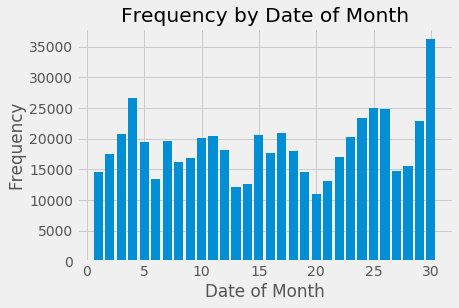

In [79]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5,30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by Date of Month')

In [83]:
for k, rows in data.groupby('dom'):
    print(k,len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [86]:
def count_rows(rows):
    return len(rows)
by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

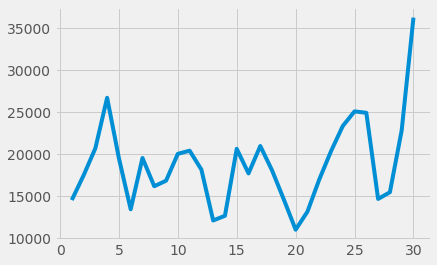

In [91]:
plot(by_date)

In [94]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

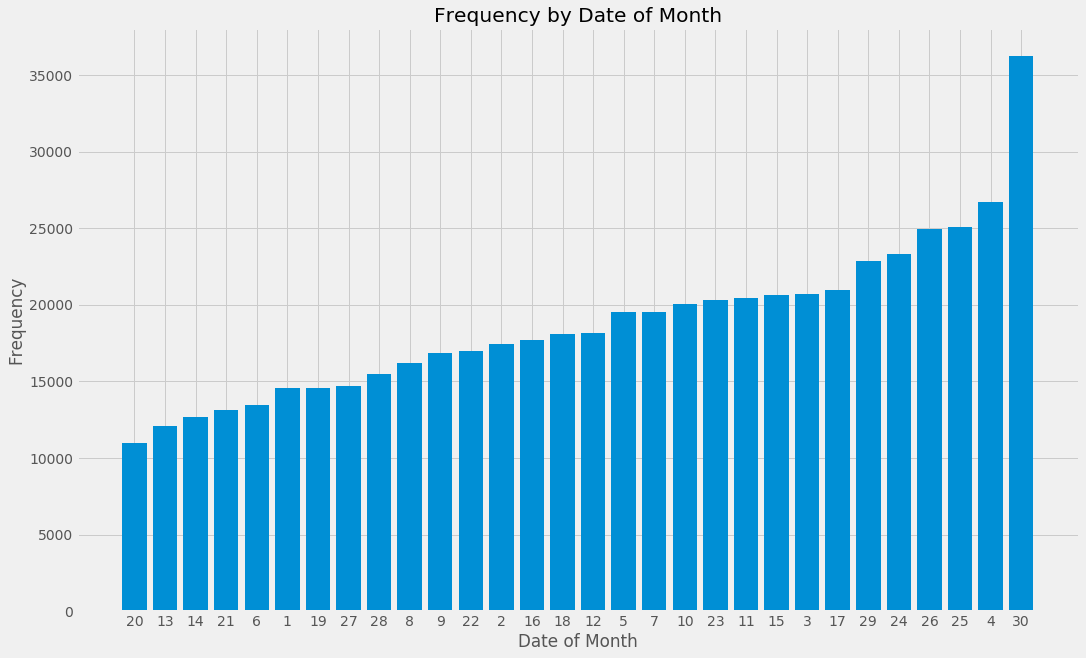

In [101]:
plt.figure(figsize=(16,10))
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by Date of Month')
;

### Analyze hour

''

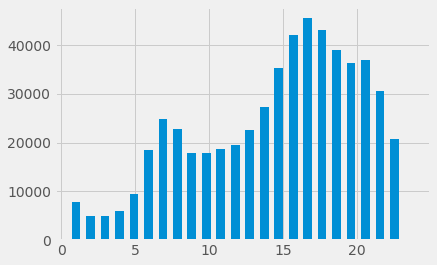

In [125]:
hist(data.hour, bins = 24, rwidth=0.6, range=(0.5, 24))
;

### Analyze the weekday

''

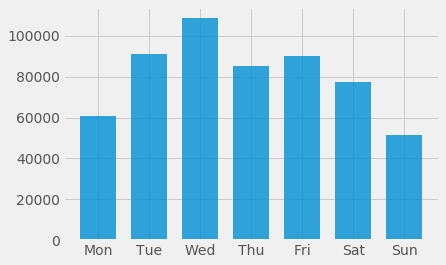

In [123]:
hist(data.weekday, bins = 7, range=(-0.5,6.5), rwidth=.7, alpha=0.8)
xticks(range(7),'Mon,Tue,Wed,Thu,Fri,Sat,Sun'.split(','))
,


### Cross analyze (hour, dow)

In [130]:
by_hour_weekday = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_hour_weekday

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


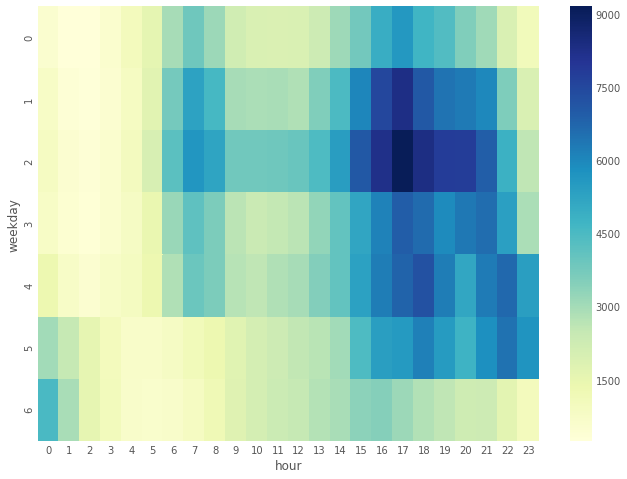

In [140]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(by_hour_weekday, cmap="YlGnBu")


### By Latitiude and Longitude

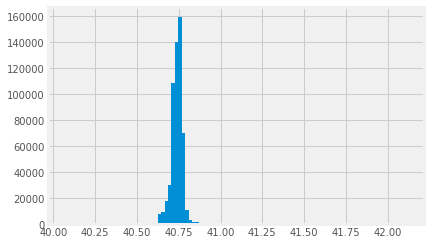

In [145]:
hist(data.Lat, bins=100 );

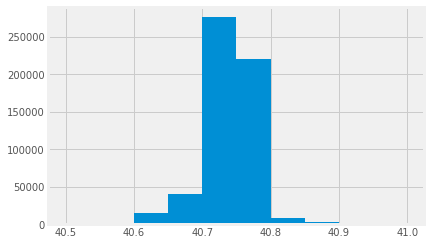

In [150]:
hist(data.Lat, range=(40.5,41) );

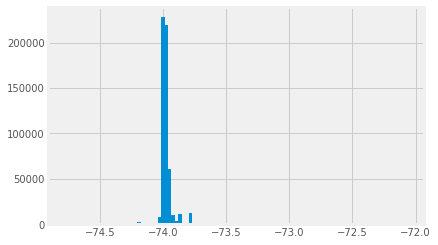

In [152]:
hist(data.Lon, bins=100 );

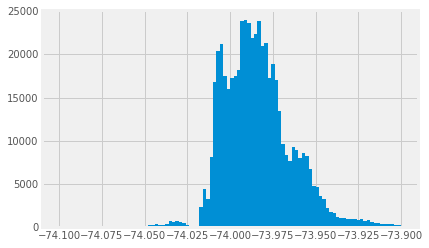

In [156]:
hist(data.Lon, bins=100, range=(-74.1,-73.9));

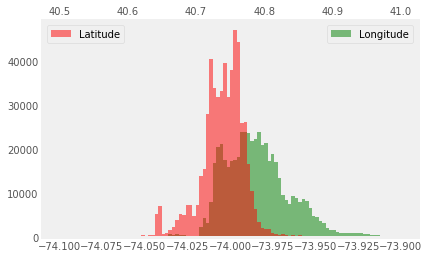

In [170]:
hist(data.Lon, bins=100, range=(-74.1,-73.9), color='g',alpha=.5, label="Longitude")
grid()
legend(loc='upper right')
twiny()
hist(data.Lat,bins=100, range=(40.5,41), color='r',alpha=.5, label = 'Latitude' );
grid()
legend(loc='upper left')

(40.7, 41)

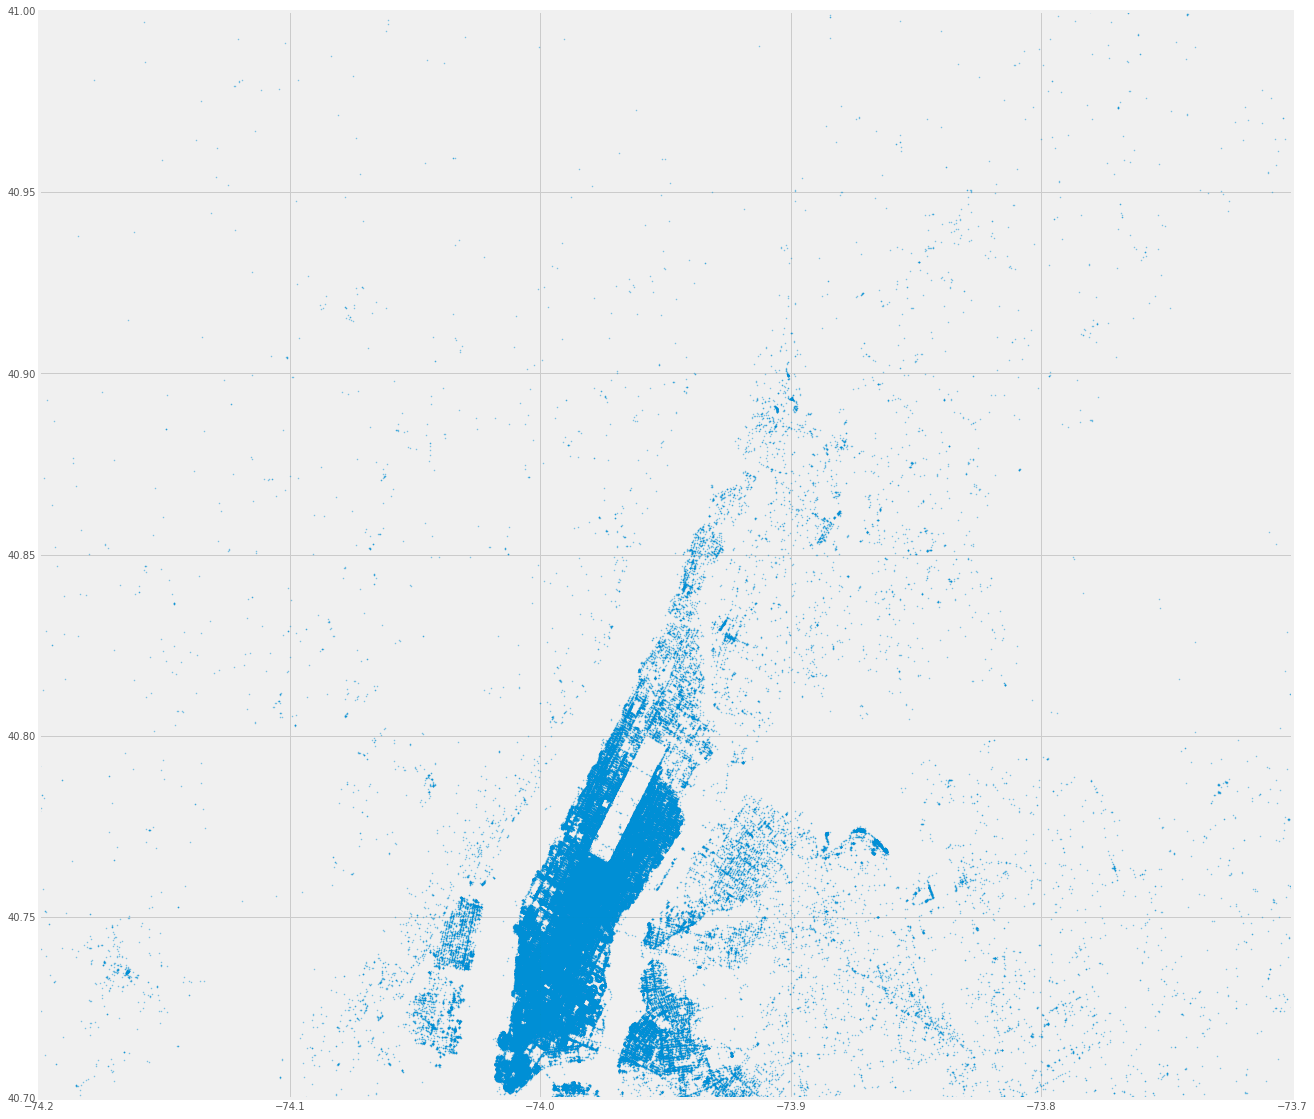

In [174]:
figure(figsize=(20,20))
plot(data['Lon'],data['Lat'],'.',alpha=0.5, ms=1 )
xlim(-74.2, -73.7)
ylim(40.7, 41)